## Introduction to Data Science Assignment 1
__Parham Javan 810800008<br>__

## Monte Carlo Simulation ##

### Calculating pi ###

In [48]:
import random
import numpy as np

def estimate_pi(num_points):
    points_inside_circle = 0

    for i in range(num_points):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        distance = x**2 + y**2
        if distance <= 1:
            points_inside_circle += 1

    return 4 * points_inside_circle / num_points

# Repeat the simulation 5 times for each number of points and compute the mean
num_points_list = [10, 100, 1000, 10000, 100000]
num_simulations = 6

for num_points in num_points_list:
    pi_estimates = []
    for i in range(num_simulations):
        pi_estimates.append(estimate_pi(num_points))
    
    mean_pi = np.mean(pi_estimates)
    print(f"Number of points: {num_points}, Mean Estimated Pi: {mean_pi}")


Number of points: 10, Mean Estimated Pi: 2.8666666666666667
Number of points: 100, Mean Estimated Pi: 3.073333333333333
Number of points: 1000, Mean Estimated Pi: 3.1646666666666667
Number of points: 10000, Mean Estimated Pi: 3.140866666666667
Number of points: 100000, Mean Estimated Pi: 3.1434266666666666


### Mensch ###



In [49]:
import random

def play_game():
    # Initialize game variables
    positions = [-1, -1, -1, -1]  # Positions of players' pieces
    out_status = [1, 1, 1, 1]  # Out areas for each player
    start_fields = [0, 10, 20, 30]  # Start fields for each player
    players = [0, 1, 2, 3]  # Player IDs

    def move_piece(player, steps):
        # Move the player's piece on the board
        current_position = positions[player]
        new_position = (current_position + steps) % 40
        positions[player] = new_position
    
    def is_winner(player, steps):
        # Check if the player has won the game
        return (positions[player] + steps) % 40 == start_fields[player] 
    
    def check_collision(player):
        # Check for collisions with other players
        current_position = positions[player]
        for other_player in players:
            if (other_player != player) and (positions[other_player] == current_position):
                positions[other_player] = -1
                out_status[other_player] = 1
   
    while True:
        for player in players:
            dice_roll = random.randint(1, 6)

            if out_status[player] == 1 and dice_roll != 6:
                continue

            if out_status[player] == 1 and dice_roll == 6:
                positions[player] = start_fields[player]
                out_status[player] = 0
                check_collision(player)
                continue

            if not is_winner(player, dice_roll):
                move_piece(player, dice_roll)
                check_collision(player)
                continue

            if is_winner(player, dice_roll):
                print("Player " + str(player) + " won!")
                return player

# Monte Carlo simulation
num_simulations = 10000
win_counts = [0, 0, 0, 0]

for i in range(num_simulations):
    winner = play_game()
    win_counts[winner] += 1

total_games = sum(win_counts)
probabilities = [count / total_games for count in win_counts]

# Display the probabilities of each player winning
for player, prob in enumerate(probabilities):
    print(f"Player {player + 1}: Probability of winning - {prob:.4f}")



Player 2 won!
Player 3 won!
Player 0 won!
Player 0 won!
Player 0 won!
Player 1 won!
Player 2 won!
Player 0 won!
Player 3 won!
Player 2 won!
Player 3 won!
Player 3 won!
Player 3 won!
Player 0 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 0 won!
Player 2 won!
Player 3 won!
Player 1 won!
Player 3 won!
Player 3 won!
Player 0 won!
Player 0 won!
Player 2 won!
Player 2 won!
Player 0 won!
Player 1 won!
Player 0 won!
Player 2 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 0 won!
Player 2 won!
Player 0 won!
Player 2 won!
Player 0 won!
Player 0 won!
Player 1 won!
Player 2 won!
Player 1 won!
Player 1 won!
Player 1 won!
Player 0 won!
Player 1 won!
Player 3 won!
Player 2 won!
Player 3 won!
Player 0 won!
Player 3 won!
Player 2 won!
Player 1 won!
Player 0 won!
Player 1 won!
Player 2 won!
Player 3 won!
Player 1 won!
Player 0 won!
Player 3 won!
Player 2 won!
Player 0 won!
Player 2 won!
Player 3 won!
Player 0 won!
Player 1 won!
Player 0 won!
Player 1 won!
Player 2 won!
Player

## Central Limit Theorem(CLT) ##

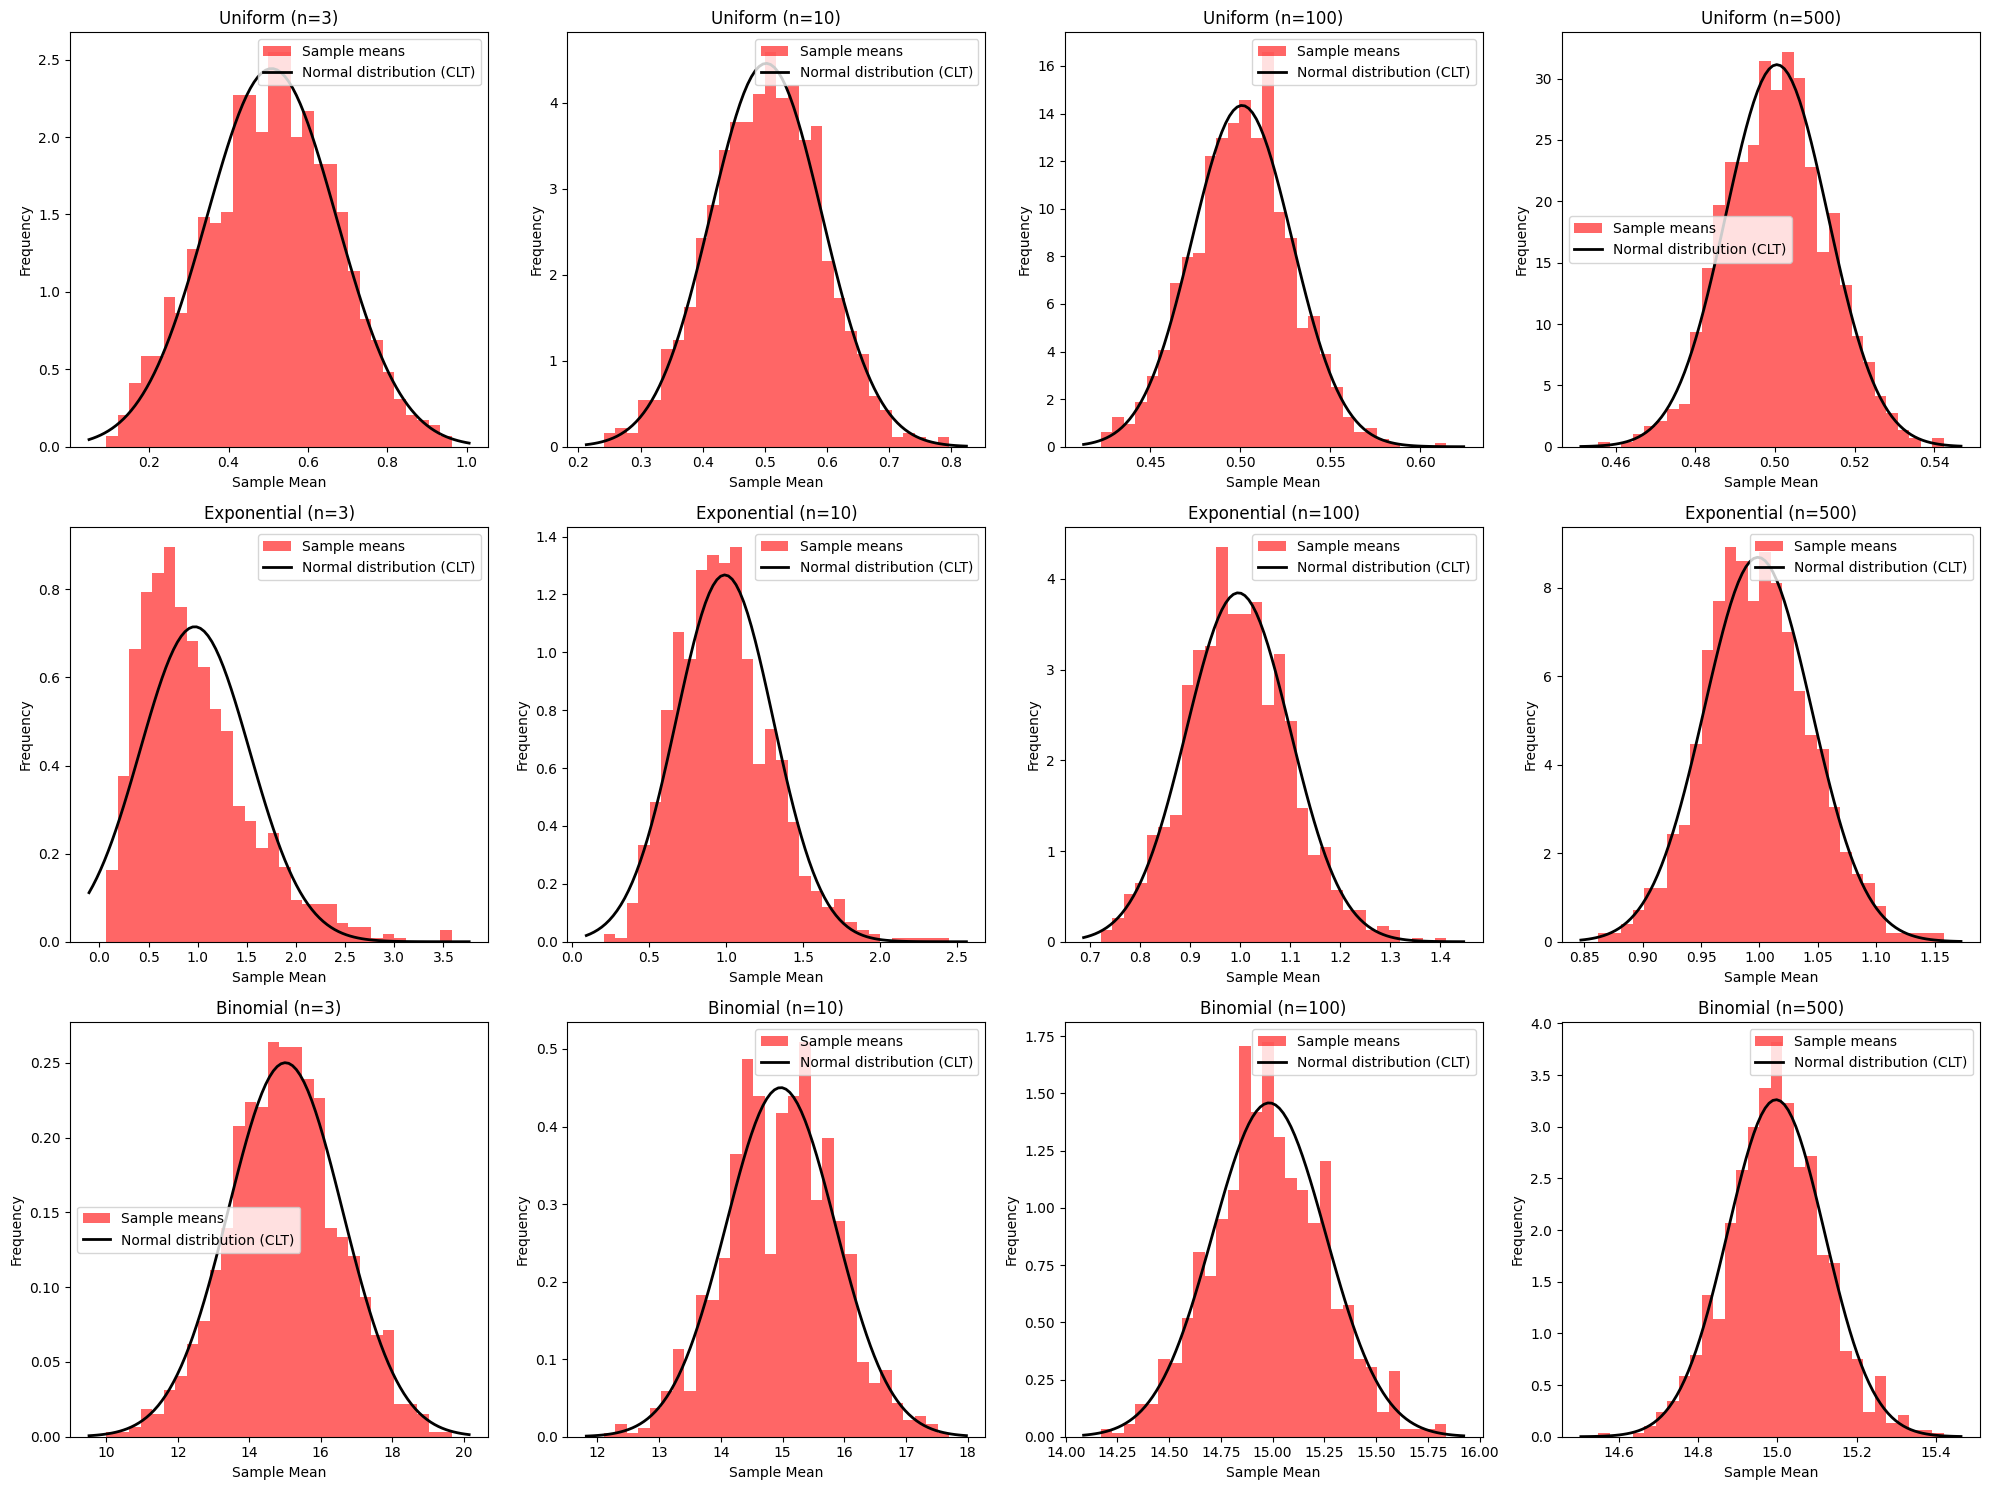

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to plot histogram of sample means
def plot_histogram(ax, sample_means, distribution_name, sample_size):
    # Plot histogram
    ax.hist(sample_means, bins=30, density=True, alpha=0.6, color='r', label='Sample means')
    
    # Calculate normal distribution parameters based on CLT
    mu = np.mean(sample_means)
    sigma = np.std(sample_means)
    
    # Plot normal distribution
    xmin, xmax = ax.get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma) #probability density function 
    ax.plot(x, p, 'k', linewidth=2, label='Normal distribution (CLT)')
    
    ax.set_title(f'{distribution_name} (n={sample_size})')
    ax.set_xlabel('Sample Mean')
    ax.set_ylabel('Frequency')
    ax.legend()

# Parameters
num_samples = 1000  # Number of samples to generate
sample_sizes = [3, 10, 100, 500]  # Different sample sizes

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# 1. Uniform Distribution
uniform_samples = np.random.uniform(0, 1, (num_samples, max(sample_sizes)))

for i, sample_size in enumerate(sample_sizes):
    sample_means = np.mean(uniform_samples[:, :sample_size], axis=1)
    plot_histogram(axs[0, i], sample_means, 'Uniform', sample_size)

# 2. Exponential Distribution
exp_samples = np.random.exponential(scale=1.0, size=(num_samples, max(sample_sizes)))

for i, sample_size in enumerate(sample_sizes):
    sample_means = np.mean(exp_samples[:, :sample_size], axis=1)
    plot_histogram(axs[1, i], sample_means, 'Exponential', sample_size)

# 3. Binomial Distribution
n, p = 30, 0.5  # Parameters for Binomial distribution
binomial_samples = np.random.binomial(n, p, (num_samples, max(sample_sizes)))

for i, sample_size in enumerate(sample_sizes):
    sample_means = np.mean(binomial_samples[:, :sample_size], axis=1)
    plot_histogram(axs[2, i], sample_means, 'Binomial', sample_size)

plt.tight_layout()
plt.show()


## Hypothesis Testing ##



### Unfair Coin ###

In [58]:
import numpy as np
import statsmodels.api as sm

# Define the biased coin probabilities
prob_heads = 0.60
prob_tails = 0.40

# Define the null hypothesis (fair coin)
null_prob_heads = 0.5

# Define the significance level
alpha = 0.05

# Function to perform hypothesis testing using confidence interval
def hypothesis_testing_confidence_interval(sample_size):
    # Simulate coin flips
    coin_flips = np.random.choice(['Heads', 'Tails'], size=sample_size, p=[prob_heads, prob_tails])
    
    # Calculate the number of heads
    num_heads = np.sum(coin_flips == 'Heads')
    
    percentage = num_heads/sample_size*100
    
    # Calculate z-score and p-value using statsmodels library
    z_score, p_value = sm.stats.proportions_ztest(num_heads, sample_size, null_prob_heads)
    
    # Make decision based on p-value
    if p_value < alpha:
        decision = "Reject the null hypothesis"
    else:
        decision = "Fail to reject the null hypothesis"
    
    # Calculate confidence interval
    ci_low, ci_high = sm.stats.proportion_confint(num_heads, sample_size, alpha=alpha)
    
    return (ci_low, ci_high), decision, z_score, p_value ,percentage

# Perform hypothesis testing using confidence interval for different sample sizes
sample_sizes = [30, 100, 1000]
for sample_size in sample_sizes:
    confidence_interval, decision, z_score, p_value ,percentage= hypothesis_testing_confidence_interval(sample_size)
    
    print(f"Sample Size: {sample_size}")
    print(f"percentage:  {round(percentage,5)}%")
    # print(f"Confidence Interval: {round(confidence_interval,4)}")
    print(f"Confidence Interval: ({round(confidence_interval[0], 5)}, {round(confidence_interval[1], 5)})")
    print(f"Z-Score: {round(z_score,5)}")
    print(f"P-Value: {round(p_value,5)}")
    print(f"Decision: {decision}")
    print()


Sample Size: 30
percentage:  46.66667%
Confidence Interval: (0.28815, 0.64519)
Z-Score: -0.36596
P-Value: 0.71439
Decision: Fail to reject the null hypothesis

Sample Size: 100
percentage:  60.0%
Confidence Interval: (0.50398, 0.69602)
Z-Score: 2.04124
P-Value: 0.04123
Decision: Reject the null hypothesis

Sample Size: 1000
percentage:  58.5%
Confidence Interval: (0.55446, 0.61554)
Z-Score: 5.45528
P-Value: 0.0
Decision: Reject the null hypothesis



### Job Placement(manual) ###


In [52]:
import pandas as pd
from scipy import stats
from scipy.stats import t
import math

# Read data from CSV file
data_frame = pd.read_csv("job_placement.csv")

# Split students into two groups based on job placement status
working_students = data_frame[data_frame['placement_status'] == 'Placed']
non_working_students = data_frame[data_frame['placement_status'] == 'Not Placed']
working_grades = working_students['gpa']
non_working_grades = non_working_students['gpa']

# Calculate sample statistics
n1 = len(working_grades)
n2 = len(non_working_grades)
mean1 = working_grades.mean()
mean2 = non_working_grades.mean()
var1 = working_grades.var()
var2 = non_working_grades.var()

degrees_of_freedom = n1+n2-2
standard_deviation = math.sqrt((((n1-1)*var1)+((n2-1)*var2))/degrees_of_freedom)


# Calculate the t-statistic and p-value for a two-tailed test
t_statistic = (mean1 - mean2) /(standard_deviation*math.sqrt((1/n1)+(1/n2)))
p_value = (1 - t.cdf(t_statistic, df=degrees_of_freedom)) * 2  #cumulative distribution function

# Report the results
print(f"t-statistic: {t_statistic}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_value}")

# Make decision based on significance level (α = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Working alongside studying has a significant impact on grades.")
else:
    print("Fail to reject null hypothesis: There is no significant impact of working alongside studying on grades.")


t-statistic: 5.105318956468754
Degrees of freedom: 698
P-value: 4.263644495239305e-07
Reject null hypothesis: Working alongside studying has a significant impact on grades.


### Job Placement(library) ###

In [53]:
from scipy.stats import ttest_ind
import pandas as pd

# Read data from CSV file
data_frame = pd.read_csv("job_placement.csv")

# Split students into two groups based on job placement status
working_students = data_frame[data_frame['placement_status'] == 'Placed']
non_working_students = data_frame[data_frame['placement_status'] == 'Not Placed']
working_grades = working_students['gpa']
non_working_grades = non_working_students['gpa']

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(working_grades, non_working_grades)

# Output the results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: Working alongside studying has a significant impact on grades.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of working alongside studying on grades.")


t-statistic: 5.105318956468754
p-value: 4.2636444940967887e-07
Reject null hypothesis: Working alongside studying has a significant impact on grades.
